# Решение конкурса на kaggle.com

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 92.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 76.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.5MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.info() #заметим, что в TotalSpent не все значения числовые, поэтому столбец приведен к строчному типу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors = 'coerce')
mean_val = data.TotalSpent.mean()
data.TotalSpent.fillna(mean_val, inplace = True)
data.info() #исправили

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.isna().mean() #нет NaN объектов

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

## Анализ данных

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

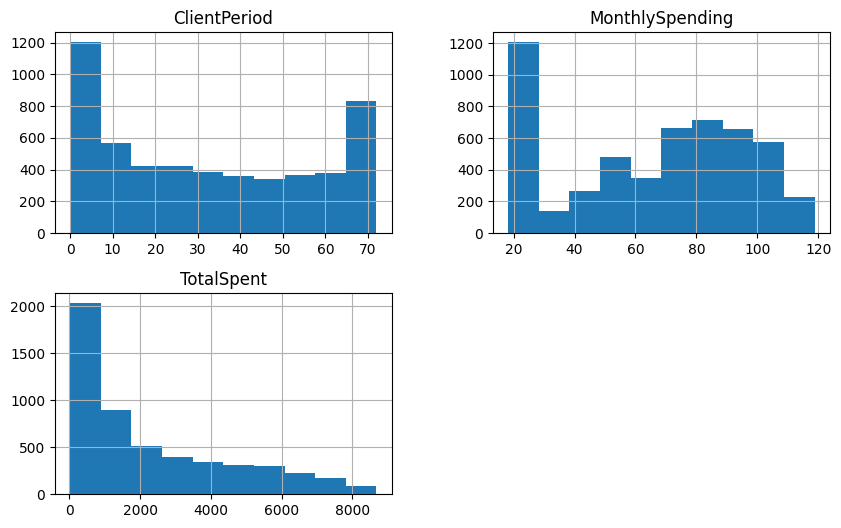

In [ ]:
data.hist(column = num_cols, figsize = (10, 6)) #гистограммы для численных признаков

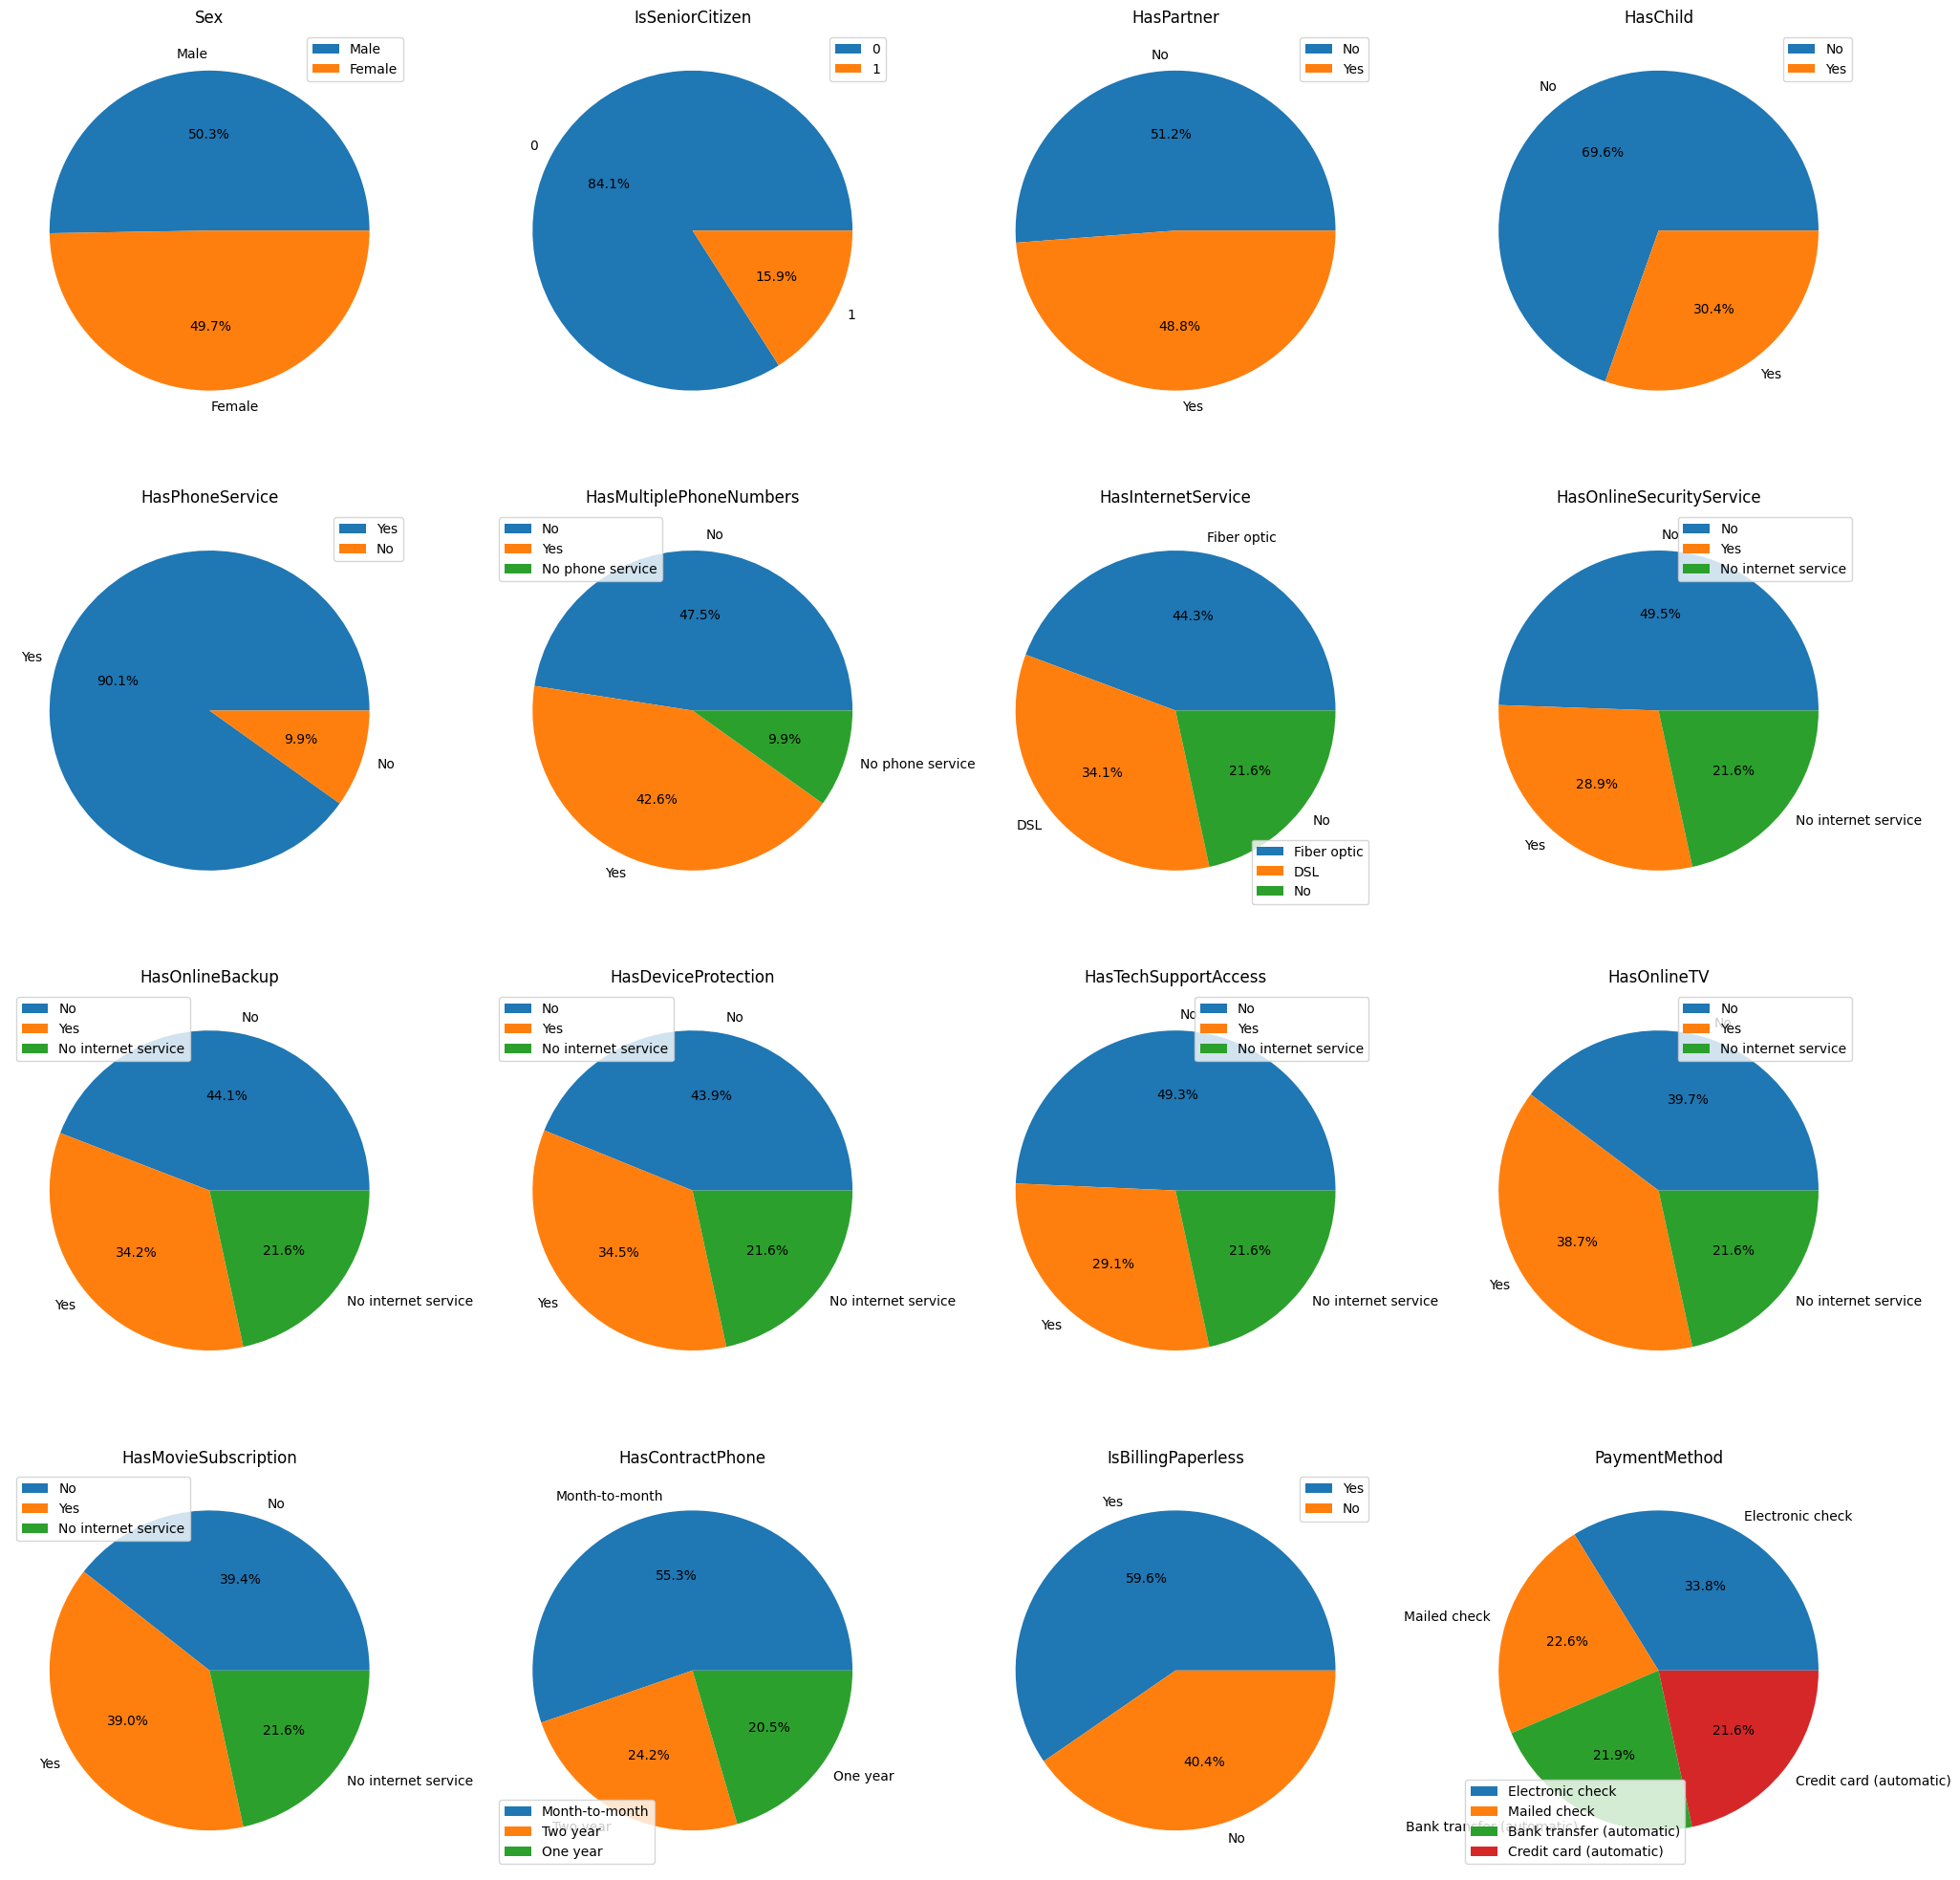

In [ ]:
figure = plt.figure(figsize =(25, 25)) #диаграммы для категориальных признаков
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.pie(data[cat_cols[i]].value_counts(), labels = data[cat_cols[i]].value_counts().index, autopct = '%1.1f%%')
  plt.title(cat_cols[i])
  plt.legend()

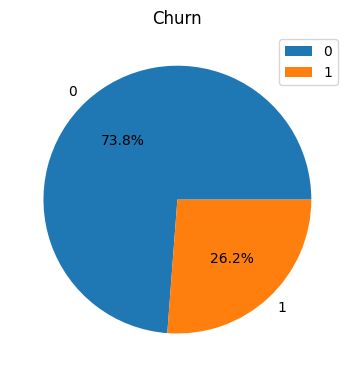

In [ ]:
plt.figure(figsize =(20, 20))
plt.subplot(4,4,1)
plt.pie(data[target_col].value_counts(), labels = data[target_col].value_counts().index, autopct = '%1.1f%%')
plt.title(target_col)
plt.legend() #сбалансированные классы

## Применение линейных моделей

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
X = pd.concat([data[num_cols], pd.get_dummies(data[cat_cols], drop_first = True)], axis = 1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score

In [ ]:
print(f'R^2: {r2_score(preds, y_test)}')
print(f'MSE: {mean_squared_error(lr.predict(X_test), y_test)}')

R^2: -0.08681799700134696
MSE: 0.19606358819076458


In [ ]:
model = make_pipeline(StandardScaler(),LogisticRegression())#модель логистической регресии
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'logisticregression__C': 100.0}
0.8417410207062354
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])


## Применение градиентного бустинга

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [28]:
!pip3 install catboost
import catboost
from catboost import CatBoostClassifier

In [ ]:
X = data[feature_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
cb = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False)
cb.fit(X_train, y_train)

In [ ]:
print('roc_auc train', roc_auc_score(y_train, cb.predict_proba(X_train)[:, 1])) #проверяем score на train
print('roc_auc test', roc_auc_score(y_test, cb.predict_proba(X_test)[:, 1])) #проверяем score на test

roc_auc train 0.895878610739224
roc_auc test 0.8368119164072921


In [ ]:
params = {'iterations':[100, 200, 400, 600, 800], 'learning_rate':[0.05, 0.1, 0.2], 'depth':[2, 4, 6, 8, 10]} #создаём гиперпараметры

model_with_grid = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)
best_model = model_with_grid.grid_search(params, X_train, y=y_train)


bestTest = 0.4071044823
bestIteration = 99

0:	loss: 0.4071045	best: 0.4071045 (0)	total: 870ms	remaining: 1m 4s

bestTest = 0.3998520579
bestIteration = 96

1:	loss: 0.3998521	best: 0.3998521 (1)	total: 1.46s	remaining: 53.3s

bestTest = 0.4023947831
bestIteration = 98

2:	loss: 0.4023948	best: 0.3998521 (1)	total: 1.85s	remaining: 44.3s

bestTest = 0.4007940339
bestIteration = 197

3:	loss: 0.4007940	best: 0.3998521 (1)	total: 2.95s	remaining: 52.4s

bestTest = 0.3989588327
bestIteration = 193

4:	loss: 0.3989588	best: 0.3989588 (4)	total: 4.22s	remaining: 59s

bestTest = 0.4002180352
bestIteration = 94

5:	loss: 0.4002180	best: 0.3989588 (4)	total: 6s	remaining: 1m 9s

bestTest = 0.399617291
bestIteration = 311

6:	loss: 0.3996173	best: 0.3989588 (4)	total: 9.88s	remaining: 1m 35s

bestTest = 0.3989588327
bestIteration = 193

7:	loss: 0.3989588	best: 0.3989588 (4)	total: 14.5s	remaining: 2m 1s

bestTest = 0.4002180352
bestIteration = 94

8:	loss: 0.4002180	best: 0.3989588 (4)	total

In [ ]:
print(f'Best params: {best_model["params"]}')
print('roc_auc', roc_auc_score(y_train, model_with_grid.predict_proba(X_train)[:, 1]))

Best params: {'depth': 4, 'iterations': 400, 'learning_rate': 0.05}
roc_auc 0.878346737752606


# Предсказания

In [ ]:
best_model = CatBoostClassifier(iterations=400, depth=4, learning_rate=0.05)
best_model.fit(X_train, y_train, cat_features=cat_cols, verbose=False)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent, errors = 'coerce')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)